In [2]:
# Ensure dependencies are synced
!uv sync

Resolved 164 packages in 0.33ms
Audited 144 packages in 0.02ms


# Sentiment Classification - Data Exploration

Loading and exploring the tweets sentiment dataset.

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tweets dataset
df = pd.read_csv('../data/tweets_v1.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (499, 13)

Columns: ['tweet', 'sentiment_class', 'user', 'sex', 'hour_of_day', 'total_comments', 'total_likes', 'total_impressions', 'tweet_length', 'verified_user', 'reply_to_verified', 'primary_topic', 'secondary_topic']

Data types:
tweet                object
sentiment_class      object
user                 object
sex                  object
hour_of_day           int64
total_comments        int64
total_likes           int64
total_impressions     int64
tweet_length          int64
verified_user          bool
reply_to_verified      bool
primary_topic        object
secondary_topic      object
dtype: object

Missing values:
tweet                0
sentiment_class      0
user                 0
sex                  0
hour_of_day          0
total_comments       0
total_likes          0
total_impressions    0
tweet_length         0
verified_user        0
reply_to_verified    0
primary_topic        0
secondary_topic      0
dtype: int64

First 5 rows:


,tweet,sentiment_class,user,sex,hour_of_day,total_comments,total_likes,total_impressions,tweet_length,verified_user,reply_to_verified,primary_topic,secondary_topic
0,Just had the most amazing coffee this morning!...,positive,@coffee_lover23,female,8,12,89,2341,71,False,False,food_drinks,arts_culture
1,Stuck in traffic again... this commute is kill...,negative,@daily_commuter,male,7,3,15,892,54,False,False,transportation,personal_development
2,The new restaurant downtown has incredible pas...,positive,@foodie_adventures,female,19,8,156,4523,68,True,False,food_drinks,personal_development
3,Can't believe how rude some people are at the ...,negative,@suburban_mom,female,14,5,23,1567,65,False,False,shopping_retail,personal_development
4,Beautiful sunset tonight! Nature never fails t...,positive,@nature_photographer,male,20,18,234,6789,58,True,False,nature_environment,personal_development


Sentiment Distribution:
sentiment_class
positive    253
negative    246
Name: count, dtype: int64

Percentage distribution:
sentiment_class
positive    50.701403
negative    49.298597
Name: count, dtype: float64


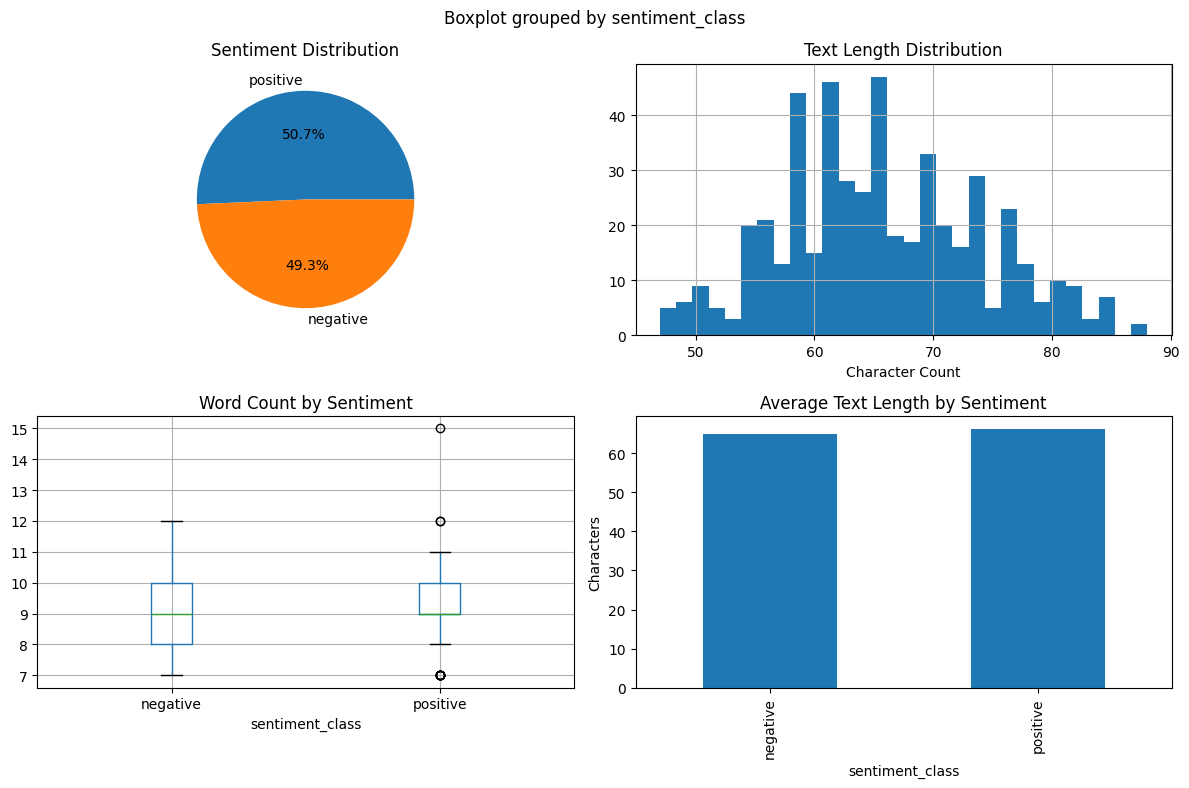


Sample texts by sentiment:

POSITIVE:
1. This meditation app's customization options support individual practice needs
2. Just finished a great workout session! Feeling energized 💪

NEGATIVE:
1. The customer service representative was incredibly rude today
2. Long lines everywhere at the mall today. Holiday shopping madness


In [4]:
# Explore sentiment distribution and text statistics
print("Sentiment Distribution:")
sentiment_counts = df['sentiment_class'].value_counts()
print(sentiment_counts)
print(f"\nPercentage distribution:")
print(sentiment_counts / len(df) * 100)

# Text length statistics
df['text_length'] = df['tweet'].str.len()
df['word_count'] = df['tweet'].str.split().str.len()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sentiment distribution pie chart
axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Sentiment Distribution')

# Text length distribution
df['text_length'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Text Length Distribution')
axes[0, 1].set_xlabel('Character Count')

# Word count by sentiment
df.boxplot(column='word_count', by='sentiment_class', ax=axes[1, 0])
axes[1, 0].set_title('Word Count by Sentiment')

# Average text length by sentiment
avg_length = df.groupby('sentiment_class')['text_length'].mean()
avg_length.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Text Length by Sentiment')
axes[1, 1].set_ylabel('Characters')

plt.tight_layout()
plt.show()

# Sample texts from each sentiment
print("\nSample texts by sentiment:")
for sentiment in df['sentiment_class'].unique():
    print(f"\n{sentiment.upper()}:")
    samples = df[df['sentiment_class'] == sentiment]['tweet'].sample(n=2, random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")